<a href="https://colab.research.google.com/github/narayan-bhattarai/AI-Classification/blob/main/Project01_TB_Classifier_Formatted.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 01: Tuberculosis Classifier
This notebook replicates the official project format: Manual preprocessing, train-test split, Dense and CNN models.

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# 1. Import Libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam

In [16]:
# 2. Load and Label Data
data_path = '/content/drive/MyDrive/MontgomerySet/MontgomerySet/CXR_png'
image_files = [f for f in os.listdir(data_path) if f.endswith('.png')]
labels = [int(f.split('_')[-1].replace('.png', '')) for f in image_files]
print('Labels:',Counter(labels))
print('Total Labeled Files:',len(labels))
print("Total Images:",len(image_files))

Labels: Counter({0: 80, 1: 58})
Total Labeled Files: 138
Total Images: 138


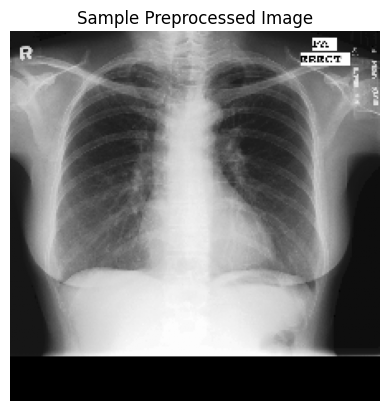

In [17]:
# 3. Image Preprocessing
def preprocessing_image(image_path, target_size=(224,224)):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    eq = cv2.equalizeHist(gray)
    norm = eq / 255.0
    resized = cv2.resize(norm, target_size)
    return resized

sample_img = preprocessing_image(os.path.join(data_path, image_files[0]))
plt.imshow(sample_img, cmap='gray')
plt.title('Sample Preprocessed Image')
plt.axis('off')
plt.show()

In [30]:
# 4. Load All Images
def image_loader(data_path):
    images = []
    labels = []
    for file in os.listdir(data_path):
        if file.endswith('.png'):
            try:
                path = os.path.join(data_path, file)
                label = int(file.split('_')[-1].replace('.png', '').strip())  # Flatten the label (not list)
                img = preprocessing_image(path)
                images.append(img)
                labels.append(label)
            except Exception as e:
                print(f"Error Processing {file} -> {e}")

    return np.array(images), np.array(labels)

# Load images
X, y = image_loader(data_path)
X = X.reshape(-1, 224, 224, 1)

print('Shape of X:', X.shape)
print('Shape of y:', y.shape)


Shape of X: (138, 224, 224, 1)
Shape of y: (138,)


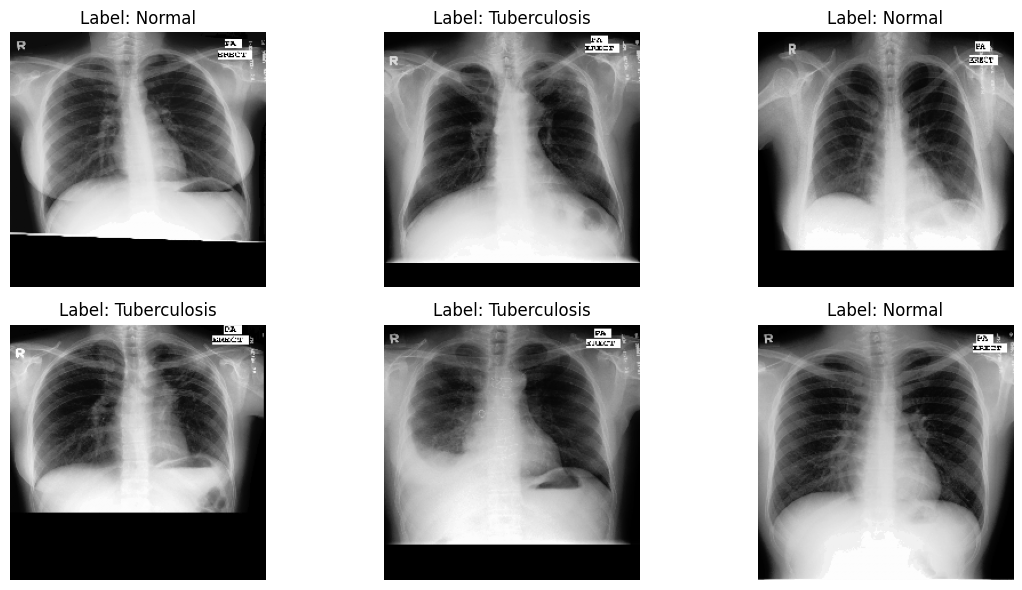

In [32]:
# Display sample images
def display_image(X, y, label_names={0: 'Normal', 1: 'Tuberculosis'}, num_samples=6):
    import matplotlib.pyplot as plt
    import random

    plt.figure(figsize=(12, 6))
    indices = random.sample(range(len(X)), num_samples)
    for i, idx in enumerate(indices):
        plt.subplot(2, num_samples // 2, i + 1)
        plt.imshow(X[idx].squeeze(), cmap='gray')
        plt.title(f"Label: {label_names[int(y[idx])]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Call to visualize
display_image(X, y)


In [33]:
# 5. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print('Train:', X_train.shape, y_train.shape)
print('Test:', X_test.shape, y_test.shape)

Train: (110, 224, 224, 1) (110,)
Test: (28, 224, 224, 1) (28,)


In [34]:
# 6. CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 222, 222, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    23,888,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,906,945 (91.20 MB)

 Trainable params: 23,906,945 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
# 7. Train Model
history = model.fit(X_train, y_train, epochs=35, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/35
4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 1.0000 - loss: 0.0199 - val_accuracy: 0.8214 - val_loss: 0.5943
Epoch 2/35
4/4 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 1.0000 - loss: 0.0229 - val_accuracy: 0.7857 - val_loss: 0.5739
Epoch 3/35
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.9912 - loss: 0.0250 - val_accuracy: 0.7857 - val_loss: 0.5538
Epoch 4/35
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 1.0000 - loss: 0.0188 - val_accuracy: 0.7857 - val_loss: 0.5639
Epoch 5/35
4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.9943 - loss: 0.0335 - val_accuracy: 0.7857 - val_loss: 0.5598
Epoch 6/35
4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 1.0000 - loss: 0.0154 - val_accuracy: 0.7857 - val_loss: 0.5603
Epoch 7/35
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 1.0000 - loss: 0.0173 - val_accuracy: 0.7857 - val_loss: 0.5746
Epoch 8/35
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 1.0000 - loss: 0.0152 - val_accuracy: 0.7857 - val_loss: 0.6015
Epoch 9/

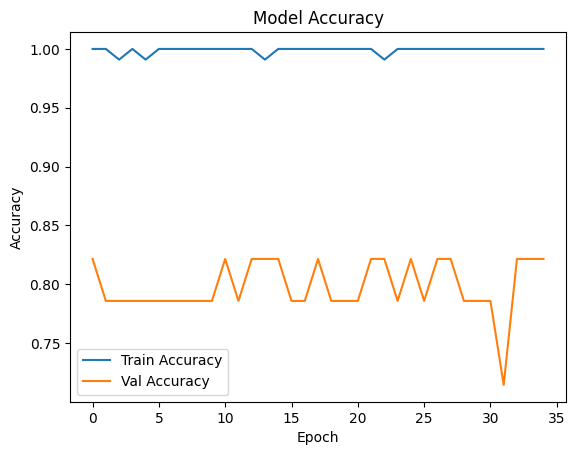

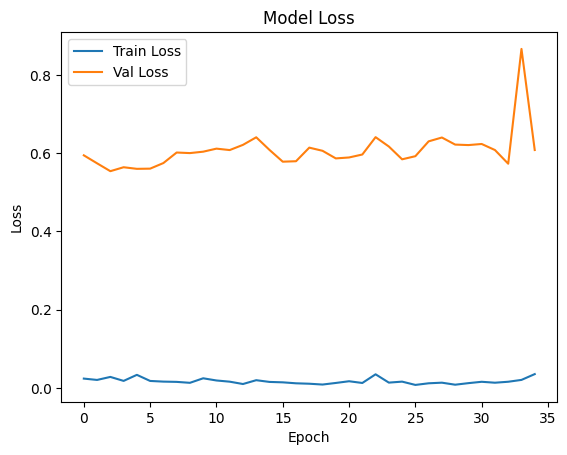

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 625ms/step
Confusion Matrix:
 [[15  1]
 [ 4  8]]

Classification Report:
               precision    recall  f1-score   support

      Normal       0.79      0.94      0.86        16
          TB       0.89      0.67      0.76        12

    accuracy                           0.82        28
   macro avg       0.84      0.80      0.81        28
weighted avg       0.83      0.82      0.82        28



In [41]:
# 8. Evaluation
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

y_pred = (model.predict(X_test) > 0.5).astype(int)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Normal', 'TB']))